In [10]:
import cv2 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import skimage
import random

Формирование функциии периодического прямоугольного сигнала

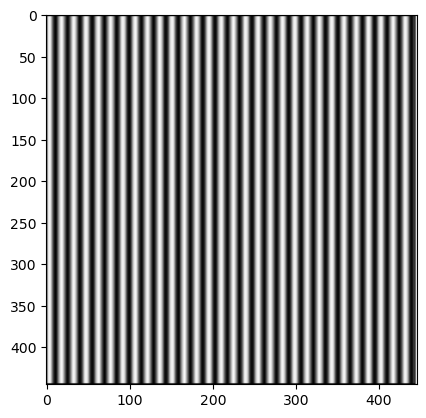

In [3]:
image_path = r'E:\GitHub\Mag_2_semester\ImageProcessing\PW_4\output.png'
image = cv2.imread(image_path)
plt.imshow(image)

Применение к изображению линейных сглаживающих фильтров

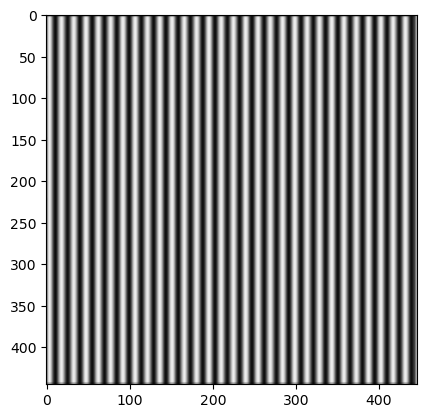

In [6]:
kernel = np.ones((3,3),np.float32)/9
processed_image = cv2.filter2D(image,-1,kernel)
plt.imshow(processed_image)

Добавление в изображения импульсного шума

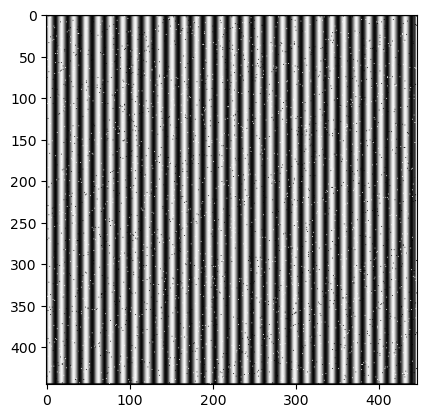

In [31]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
image_noise = sp_noise(image, 0.01)
plt.imshow(image_noise)

Применение к изображению медианного фильтра

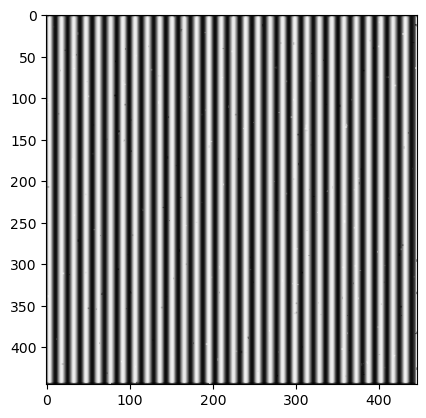

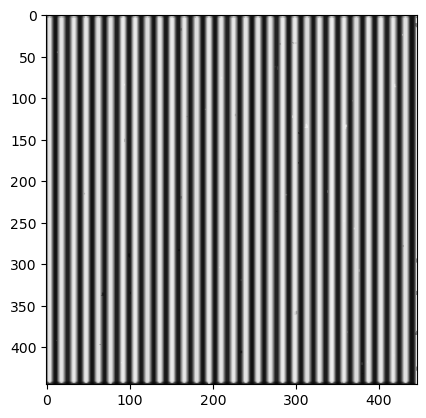

In [34]:
img_3 = cv2.medianBlur(image_noise, 3)
img_5 = cv2.medianBlur(image_noise, 5)
plt.imshow(img_3)
plt.show()
plt.imshow(img_5)
plt.show()

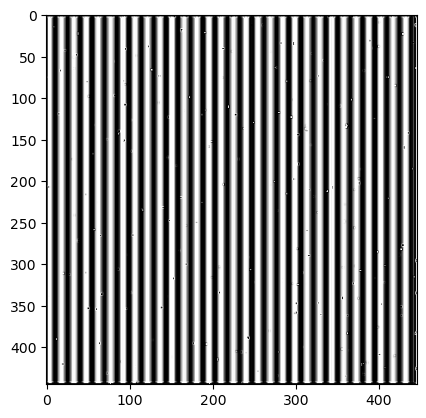

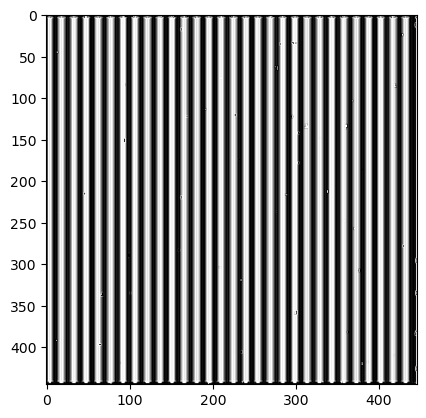

In [35]:
sharp_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# ddepth=-1 означает, что глубина получившейся картинки будет как у исходной
sharpen_img_3 = cv2.filter2D(img_3, ddepth=-1, kernel=sharp_filter)
sharpen_img_5 = cv2.filter2D(img_5, ddepth=-1, kernel=sharp_filter)
plt.imshow(sharpen_img_3)
plt.show()
plt.imshow(sharpen_img_5)
plt.show()